## Pocket Algorithm MNIST 

The Pocket Learning algorithm is a simple modification to the perceptron. Since the algorithm proceeds by updating the weights using a single point at each step, the overall accuracy on the training set might go down in a single update. In the pocket algorithm, instead of using the classification function obtained at the end of all iterations, one simultaneously calculates the training accuracy at each step, and stores the most accurate hypothesis function obtained from each past step. At the end, the hypothesis is the best possible that could be obtained from the training set with this algorithm.

In [1]:
using Pkg
using Images
#import Pkg; Pkg.add("Colors")
using Colors

In [2]:
using MLDatasets, Images, TestImages

train_x, train_y = MNIST.traindata()
test_x, test_y = MNIST.testdata();

##### MNIST DATASET OVERVIEW

<img src="Images/MNIST-dataset.png" width="300" height="300" />


In [3]:
size(train_x)

(28, 28, 60000)

In [4]:
size(train_y)

(60000,)

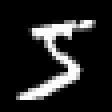

In [5]:
colorview(Gray, train_x[:,:,1]')

In [6]:
#Verify Shape of the elements
train_x[:,:,1]

28×28 Array{N0f8,2} with eltype Normed{UInt8,8}:
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.216  0.533  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.675  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.071  0.886  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.671  0.992  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.118     0.859  0.992  0.831  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.141     0.992  0.992  0.529  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.369  …  0.992  0.992  0.518  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.604     0.992  0.957  0.063  0.0  0.0  0.0
 0.0  0.0  0.0 

In [7]:
#check the label of the above matrix
train_y[1]
X = [reshape(train_x[:,:,i], 784, 1) for i = 1:60000] #X is 60000 column vectors
size(reshape(train_x[:,:,1], 784, 1)) #reshapes into a 1d column vector.

(784, 1)

In [8]:
function sign(w, x)
    x = push!(copy(x), 1.0)
    return w'x > 0 ? 1 : -1
end

sign (generic function with 1 method)

##### Error Function

$$\operatorname{Err}\left(\overrightarrow{\boldsymbol{w}}^{(i+1)}\right)=\frac{1}{N} \sum_{n=1}^{N}\left[\operatorname{sgn}\left(\overrightarrow{\boldsymbol{w}}^{(i+1)} \overrightarrow{\boldsymbol{x}}^{(n)}\right) \neq y^{(n)}\right]$$

In [10]:
function errors(w)
    return sum([sign(w, pocket_train_x[i]) != pocket_train_y[i] ? 1 : 0
            for i = 1:size(pocket_train_x)[1]])/size(pocket_train_x)[1]
end

errors (generic function with 1 method)

In [11]:
# Reducing the dimension of the input data
pocket_train_x = []
pocket_train_y = []
for i = 1:60000
    if train_y[i] == 1 || train_y[i] == 5
        push!(pocket_train_x, reshape(train_x[:,:,i], 784))
        push!(pocket_train_y, train_y[i] == 1 ? 1 : -1)
    end
end

#### Algorithm for Errors

$$\begin{array}{l}
\text { if }\left(\operatorname{Err}\left(\vec{w}^{(i+1)}\right)<\text { bestErr }\right): \\
\qquad \begin{array}{l}
\widehat{\boldsymbol{w}}=\overrightarrow{\boldsymbol{w}}^{(i+1)} \\
\text { best } E r r=\operatorname{Err}\left(\overrightarrow{\boldsymbol{w}}^{(i+1)}\right)
\end{array}
\end{array}$$

In [12]:
function pocket_algorithm(T)
    w = rand(785)
    w_hat = copy(w)
    for i = 1:T
        for j = 1:size(pocket_train_x)[1]
            if sign(w, pocket_train_x[j]) != pocket_train_y[j]
                w += pocket_train_y[j]*push!(copy(pocket_train_x[j]),1.0)
                if errors(w) < errors(w_hat)
                    w_hat = copy(w)
                end
            end
        end
    end
    return w_hat
end

pocket_algorithm (generic function with 1 method)

In [13]:
w_new = pocket_algorithm(50);


In [14]:
indicies = []
for i in 1:size(test_y)[1]
    if test_y[i] == 1 || test_y[i] == 5
        push!(indicies, (i, test_y[i]))
    end
end

In [15]:
function check_value(i)
    println("Predicted value:", 
        sign(w_new, reshape(test_x[:,:,indicies[i][1]], 784)) == 1 ? 1 : 5, "\n")
    println("Labeled value:", test_y[indicies[i][1]], "\n")
    println("Image:")
    colorview(Gray, test_x[:,:,indicies[i][1]]')
end

check_value (generic function with 1 method)

Predicted value:1

Labeled value:1

Image:


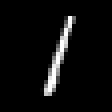

In [16]:
check_value(1)
